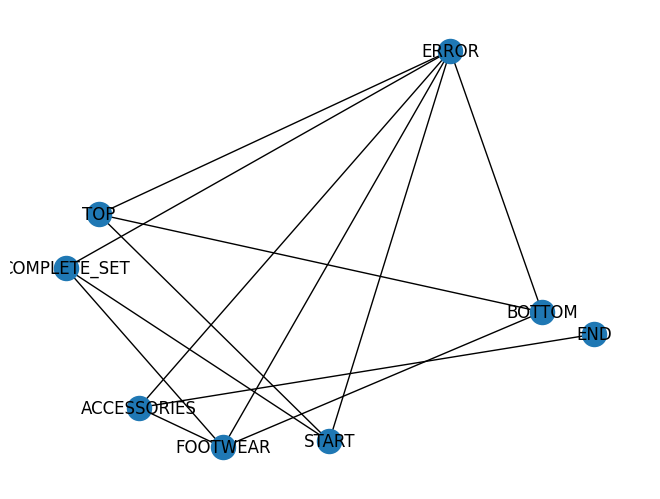

In [13]:
import networkx as nx

G = nx.Graph()

# 7 states 

G.add_node('START', pos=(0, 0))
G.add_node('TOP', pos=(1, 0))
G.add_node('BOTTOM', pos=(2, 0))
G.add_node('FOOTWEAR', pos=(3, 0))
G.add_node('ACCESSORIES', pos=(4, 0))
G.add_node('COMPLETE_SET', pos=(5, 0))
G.add_node('END', pos=(6, 0))
G.add_node('ERROR', pos=(7, 0))

# START = ( top -> B | completeSet -> F)
G.add_edge('START', 'TOP', weight=0)
G.add_edge('START', 'COMPLETE_SET', weight=0)

# B = (bottom -> C)
G.add_edge('TOP', 'BOTTOM', weight=0)

# C = (footwear -> D)
G.add_edge('BOTTOM', 'FOOTWEAR', weight=0)

# D = (accessories -> E) | (end -> END)
G.add_edge('FOOTWEAR', 'ACCESSORIES', weight=0)
G.add_edge('FOOTWEAR', 'END', weight=0)

# E = (end -> END)
G.add_edge('ACCESSORIES', 'END', weight=0)

# F = (footwear -> D)
G.add_edge('COMPLETE_SET', 'FOOTWEAR', weight=0)

# connect each state to the ERROR state
G.add_edge('START', 'ERROR', weight=-100)# it menas not possible classes
G.add_edge('TOP', 'ERROR', weight=-1) 
G.add_edge('BOTTOM', 'ERROR', weight=-0.66)
G.add_edge('FOOTWEAR', 'ERROR', weight=-0.33)  
G.add_edge('ACCESSORIES', 'ERROR', weight=-100)
G.add_edge('COMPLETE_SET', 'ERROR', weight=-1)

nx.draw(G, with_labels=True)


In [14]:
def error_function(G, state, actions_list=[], error_value=0):
    
    if state == 'END' and len(actions_list) == 0:
        if error_value > 0:
            return error_value
        else:
            return 0
    
    if state == 'ERROR':
        return error_value
    
    action = actions_list.pop(0)

    if action in G[state] and action != 'ERROR' and G[state][action]:
        return error_function(G, action, actions_list, error_value)
    elif action in G[state] and action != 'ERROR' and not G[state][action]:
        return error_function(G, action, actions_list, error_value + G[state]['ERROR']['weight'])
    else:     
        return error_function(G, 'ERROR', [], error_value + G[state]['ERROR']['weight'])


## Test

In [15]:
actions_list = ['COMPLETE_SET', 'FOOTWEAR', 'ACCESSORIES', 'END']
print(error_function(G, 'START', actions_list))

0


In [18]:
actions_list = ['TOP', 'BOTTOM', 'FOOTWEAR', 'COMPLETE_SET', 'END']
print(error_function(G, 'START', actions_list))

-1


In [23]:
actions_list = ['TOP', 'BOTTOM', 'ERROR', 'ERROR', 'END']
print(error_function(G, 'START', actions_list))

-0.66


In [22]:
actions_list = ['TOP', 'BOTTOM', 'FOOTWEAR', 'ERROR', 'END']
print(error_function(G, 'START', actions_list))

-0.33


In [11]:
actions_list = ['TOP', 'BOTTOM', 'FOOTWEAR', 'ACCESSORIES', 'END']
print(error_function(G, 'START', actions_list))

0
